In [1]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate confusion matrix for the most confused classes
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
# read the json file
df = pd.read_json("../dataset/amazon/llm_graph_gpt3_h3.json")

In [3]:
df["gpt3_graph_h3"] = df["gpt3_graph_h3"].str.replace("*", "").str.replace("'", "").str.replace('"', '')
df["gpt3_graph_h3"] = df["gpt3_graph_h3"].apply(lambda x: x if x in df["Cat3"].values else df["Cat3"].sample(1).values[0])
f1_h3 = f1_score(df["gpt3_graph_h3"], df["Cat3"], average="macro")
f1_h3

0.44518641597690983

                   precision  recall  f1-score  support
harnesses leashes        0.0     0.0       0.0      1.0
nut clusters             0.0     0.0       0.0      2.0
novelties                0.0     0.0       0.0      2.0
money banks              0.0     0.0       0.0      1.0
meat gifts               0.0     0.0       0.0      2.0
...                      ...     ...       ...      ...
hydrometers              1.0     1.0       1.0      1.0
breadsticks              1.0     1.0       1.0      2.0
sauces gifts             1.0     1.0       1.0      2.0
coatings batters         1.0     1.0       1.0      1.0
toaster pastries         1.0     1.0       1.0      2.0

[376 rows x 4 columns]


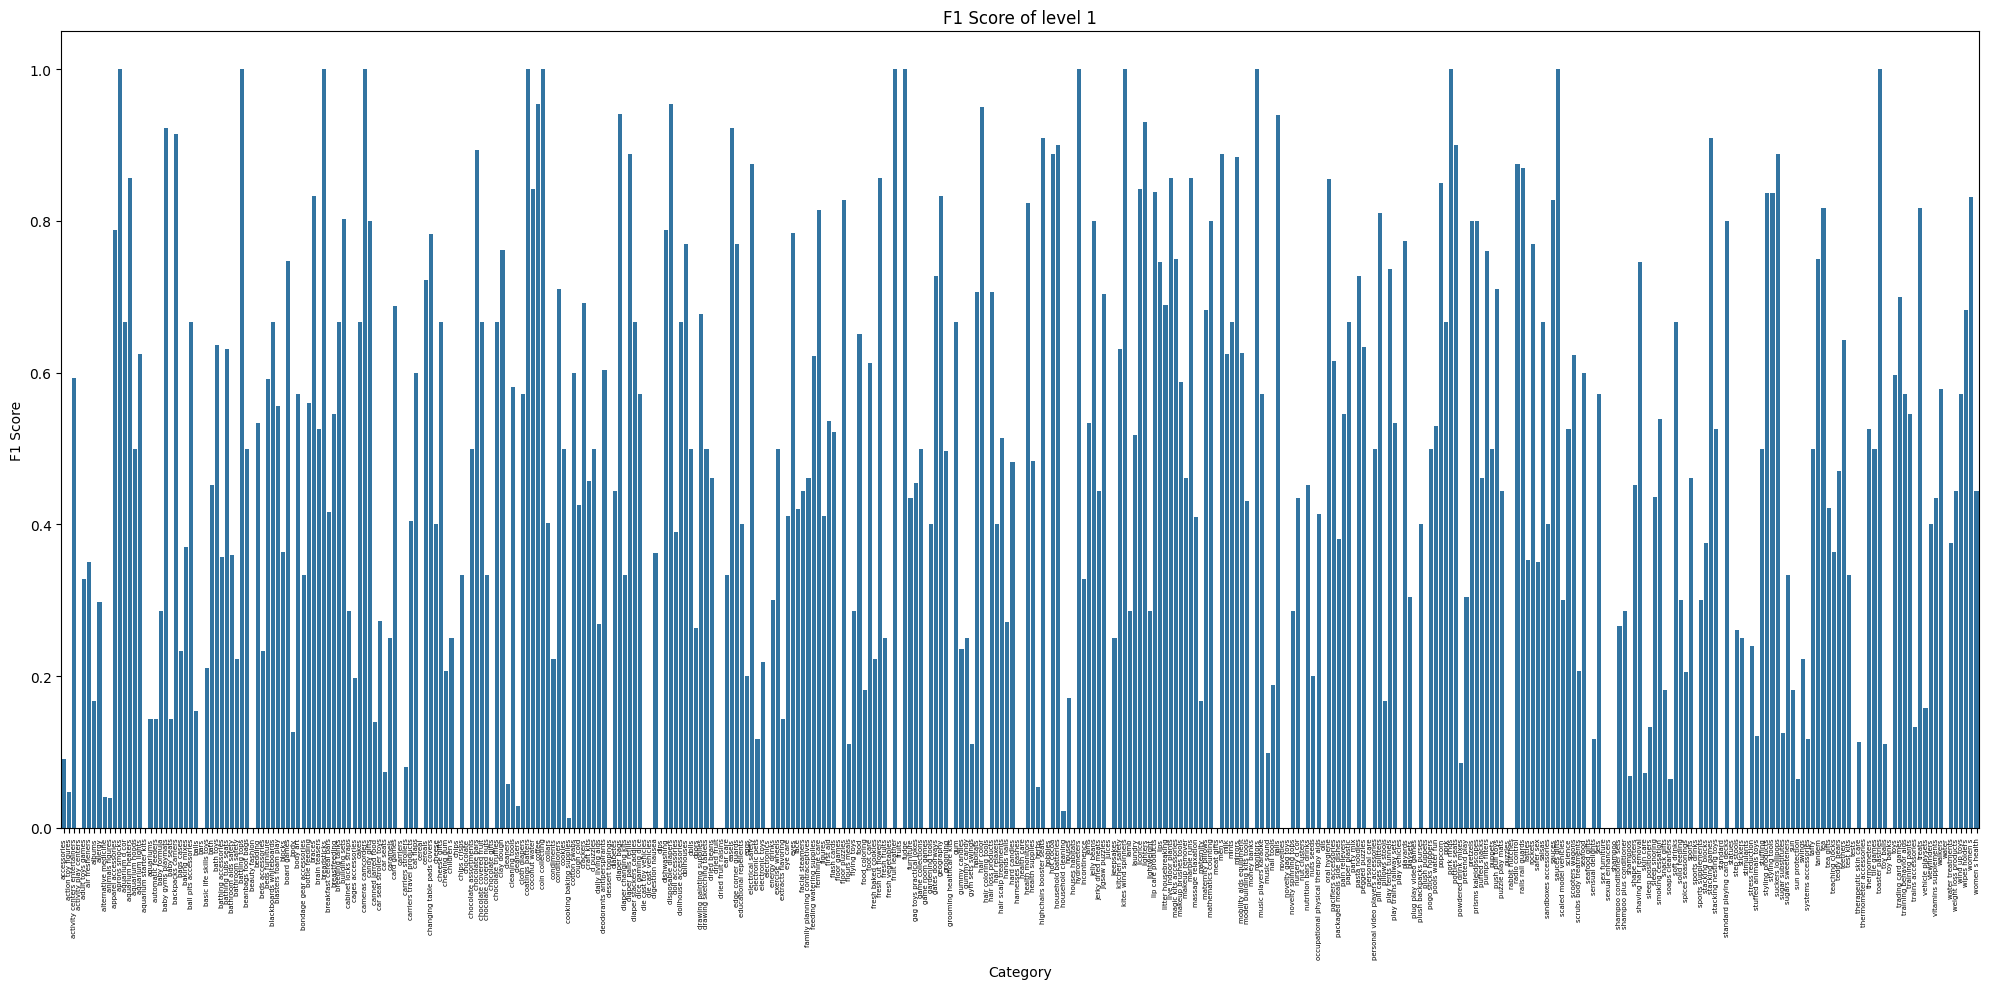

In [4]:
report = classification_report(df["Cat3"], df["gpt3_graph_h3"], output_dict=True, zero_division=0)

# Convert to DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Display the report
print(report_df.sort_values(by='f1-score'))

# Plot F1 scores by class
plt.figure(figsize=(20, 10))
sns.barplot(x=report_df.index, y=report_df['f1-score'])
plt.xticks(rotation=90, fontsize=5)  # Reduced font size for x-axis labels
plt.title('F1 Score of level 1')
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.savefig('amazon_level3.pdf')
plt.show()

In [5]:
df["gpt3_graph_h2"] = df["gpt3_graph_h2"].str.replace("*", "").str.replace("'", "").str.replace('"', '')
# df["gpt3_graph_h2"] = df["gpt3_graph_h2"].fillna(df["Cat2"].sample(len(df)))
df["gpt3_graph_h2"] = df["gpt3_graph_h2"].apply(lambda x: x if x in df["Cat2"].values else df["Cat2"].sample(1).values[0])
f1_h2 = f1_score(df["gpt3_graph_h2"], df["Cat2"], average="macro")
f1_h2

0.6549240136495331

                                  precision    recall  f1-score  support
grown up toys                      0.000000  0.000000  0.000000     39.0
baby child care                    0.000000  0.000000  0.000000     35.0
baby food                          0.000000  0.000000  0.000000      2.0
cooking baking supplies            0.114286  0.695652  0.196319     23.0
herbs                              0.153846  0.363636  0.216216     22.0
...                                     ...       ...       ...      ...
diapering                          0.913043  0.947368  0.929889    133.0
games                              0.974093  0.912621  0.942356    206.0
fragrance                          0.924752  0.993617  0.957949    470.0
fresh flowers live indoor plants   0.928571  1.000000  0.962963     13.0
fish aquatic pets                  0.972028  0.978873  0.975439    142.0

[64 rows x 4 columns]


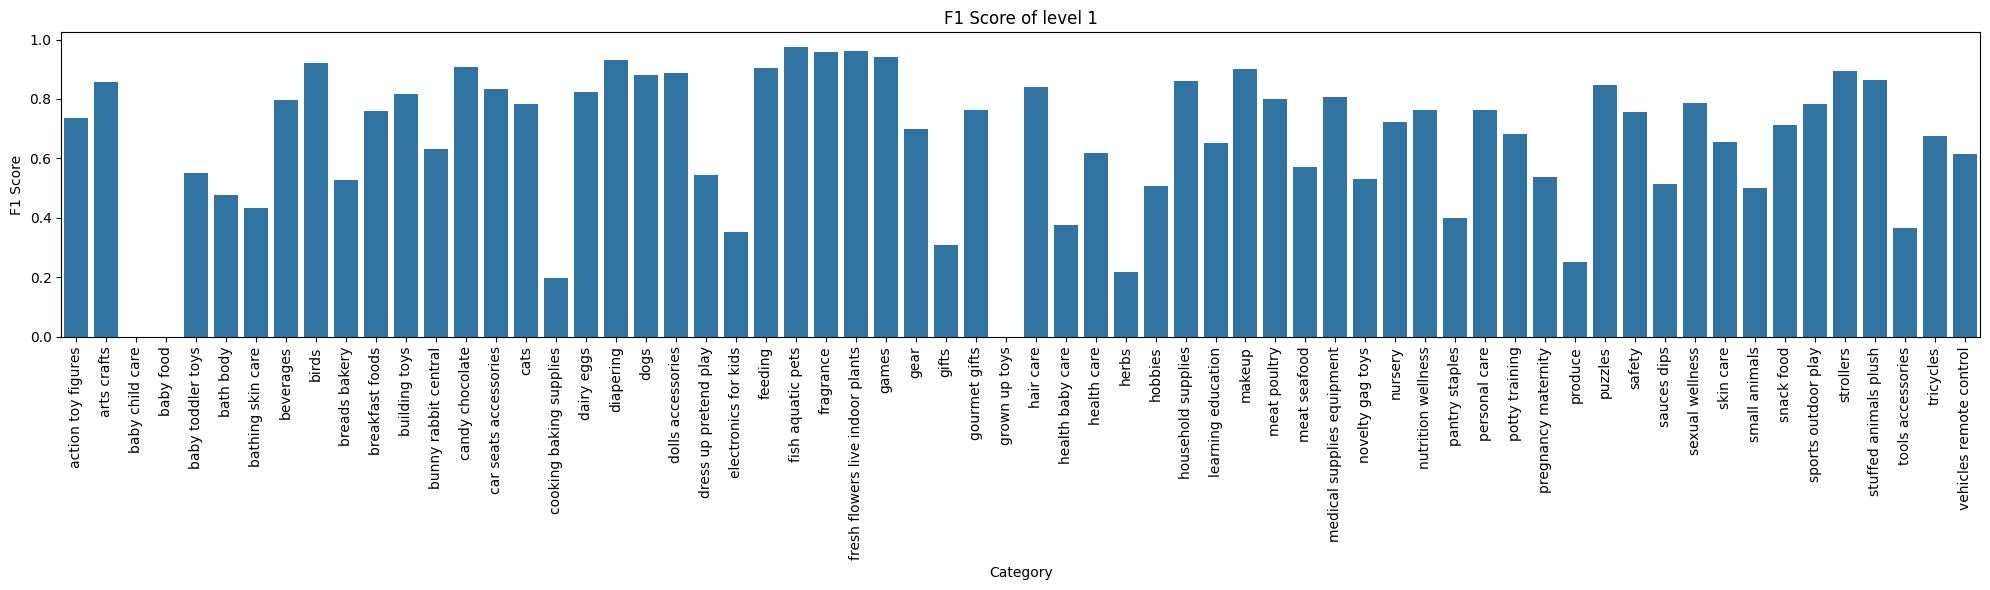

In [6]:
report = classification_report(df["Cat2"], df["gpt3_graph_h2"], output_dict=True)

# Convert to DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Display the report
print(report_df.sort_values(by='f1-score'))

# Plot F1 scores by class
plt.figure(figsize=(20, 6))
sns.barplot(x=report_df.index, y=report_df['f1-score'])
plt.xticks(rotation=90)
plt.title('F1 Score of level 1')
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.savefig('amazon_level2.pdf')
plt.show()

In [7]:
df["gpt3_graph"] = df["gpt3_graph"].str.replace("*", "").str.replace("'", "").str.replace('"', '')
df["gpt3_graph"] = df["gpt3_graph"].apply(lambda x: x if x in df["Cat1"].values else df["Cat1"].sample(1).values[0])
f1_only = f1_score(df["gpt3_graph"], df["Cat1"], average="macro")
f1_only

0.9087397354082745

                      precision    recall  f1-score  support
baby products          0.772049  0.903175  0.832480    630.0
health personal care   0.935741  0.839645  0.885093   2931.0
beauty                 0.899951  0.905279  0.902607   2027.0
grocery gourmet food   0.864045  0.948212  0.904174    811.0
toys games             0.923980  0.975212  0.948905   1533.0
pet supplies           0.973651  0.984772  0.979180   1576.0


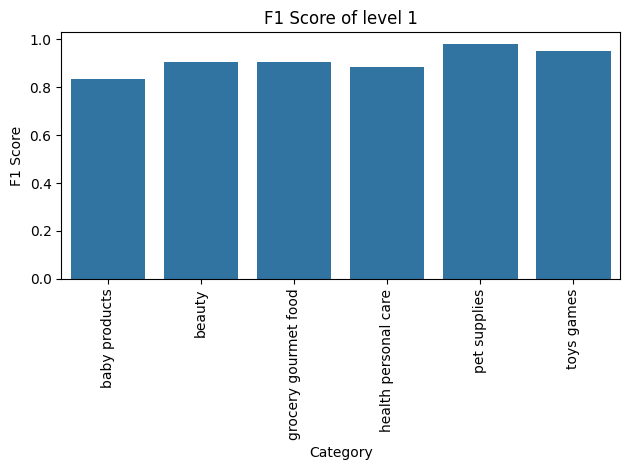

In [8]:
report = classification_report(df["Cat1"], df["gpt3_graph"], output_dict=True)

# Convert to DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Display the report
print(report_df.sort_values(by='f1-score'))

# Plot F1 scores by class
plt.figure()
sns.barplot(x=report_df.index, y=report_df['f1-score'])
plt.xticks(rotation=90)
plt.title('F1 Score of level 1')
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.savefig('amazon_level1.pdf')
plt.show()